In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

In [2]:
crimes = pd.read_csv('Chicago_Crimes.csv')

In [3]:
crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [4]:
crimes['Location Description'] = crimes['Location Description'].fillna(crimes['Location Description'].mode()[0])
crimes['Community Area'] = crimes['Community Area'].fillna(crimes['Community Area'].mode()[0])
crimes['X Coordinate'] = crimes['X Coordinate'].fillna(crimes['Latitude'].mode()[0])
crimes['Y Coordinate'] = crimes['Y Coordinate'].fillna(crimes['Latitude'].mode()[0])
crimes['Latitude'] = crimes['Latitude'].fillna(crimes['Latitude'].mode()[0])
crimes['Longitude'] = crimes['Longitude'].fillna(crimes['Longitude'].mode()[0])
crimes['Location'] = crimes['Location'].fillna(crimes['Latitude'].mode()[0])

In [5]:
crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [6]:
list(crimes.columns)

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [7]:
crimes['Date'] = crimes['Date'].str.strip()

crimes['Date'] = crimes['Date'].astype('str')

crimes['Date'] = crimes['Date'].str.replace('/', '-')

crimes['Date'] = pd.to_datetime(crimes['Date'], dayfirst=True, errors='coerce')

crimes['Case Number'] = crimes['Case Number'].astype('category')
crimes['Block'] = crimes['Block'].astype('category')
crimes['IUCR'] = crimes['IUCR'].astype('category')
crimes['Primary Type'] = crimes['Primary Type'].astype('category')
crimes['Description'] = crimes['Description'].astype('category')
crimes['Location Description'] = crimes['Location Description'].astype('category')
crimes['FBI Code'] = crimes['FBI Code'].astype('category')
crimes['Updated On'] = crimes['Updated On'].astype('category')
crimes['Location'] = crimes['Location'].astype('category')

In [8]:
crimes['Year'] = crimes['Date'].dt.year
crimes['Month'] = crimes['Date'].dt.month
crimes['Day'] = crimes['Date'].dt.day
crimes['DayOfWeek'] = crimes['Date'].dt.dayofweek

In [9]:
crimes.dtypes

ID                               int64
Case Number                   category
Date                    datetime64[ns]
Block                         category
IUCR                          category
Primary Type                  category
Description                   category
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                      category
X Coordinate                   float64
Y Coordinate                   float64
Year                             int32
Updated On                    category
Latitude                       float64
Longitude                      float64
Location                      category
Month                            int32
Day                              int32
DayOfWeek                        int32
dtype: object

In [10]:
crimes1 = crimes[crimes['Primary Type'] == 'BATTERY']

crimes1 = crimes1.groupby(['Latitude','Longitude']).size().reset_index(name='crime_count')

x = folium.Map(location=[41.7958,-87.6232], zoom_start=10)

HeatMap(crimes1).add_to(x)
x

<h2>INSIGHTS</h2>

<h3>1.The heatmap highlights that battery cases are most densely clustered in the downtown core and south-side neighborhoods, indicating these zones face the highest frequency of violent incidents.</h3>
<h3>2.These hotspots correspond with places of high population and activity such as commercial centers and major transit points where large crowds may raise the chances of confrontations.</h3>
<h3>3.In contrast, the outer edges of Chicago and its suburban areas record significantly fewer battery incidents, suggesting these locations are comparatively safer from physical assault crimes.</h3>

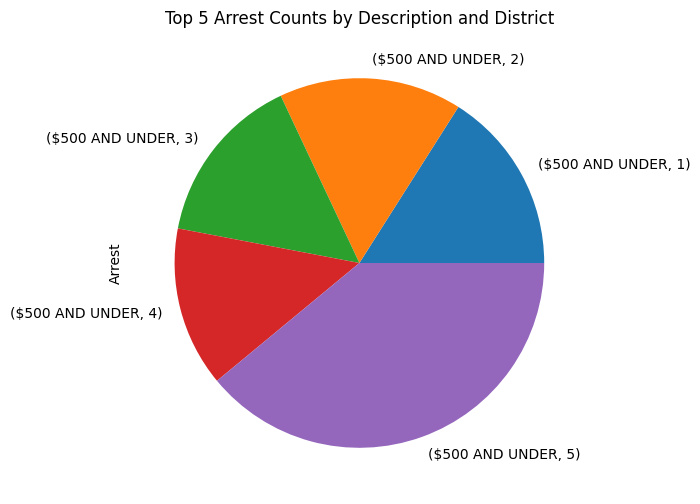

In [11]:
x = crimes.groupby(['Description', 'District'])['Arrest'].sum().head(5)
x.plot(kind='pie', figsize=(12, 6))
plt.title('Top 5 Arrest Counts by Description and District')
plt.show()

<h2>INSIGHTS</h2>

<h3>4. All districts has a majority of arrested crimes with theft $500 and under</h3>
<h3>5. Districts 1-4 has balanced counts of arrests according to the chart</h3>
<h3>6. District 5 has the largest counts of arrests, indicating that this area has the most theft rate compared to others districts</h3>

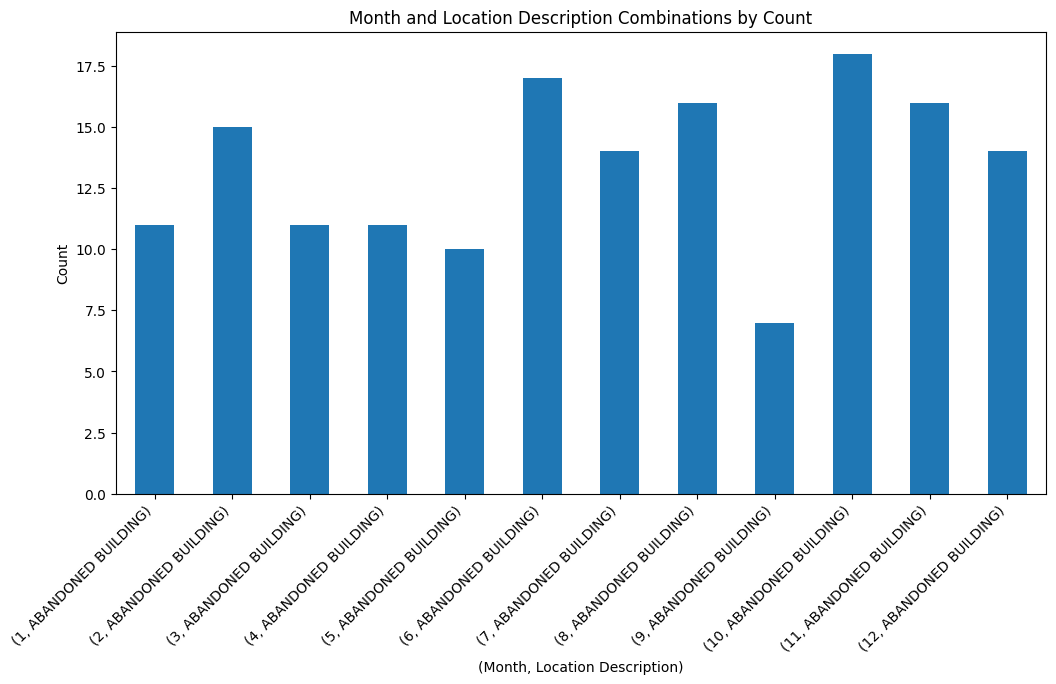

In [12]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

x = crimes.groupby(['Month', 'Location Description']).size().sort_index(level=0)

x = x.groupby(level=0).head(1)
x.plot(kind='bar', figsize=(12, 6))

plt.title('Month and Location Description Combinations by Count')
plt.xlabel('(Month, Location Description)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<h2>INSIGHTS</h2>

<h3>7. October records the highest number of crimes in abandoned buildings, pointing to a seasonal surge that may be tied to colder weather or holiday-related influences.</h3>
<h3>8. September reflects the lowest occurrence of such crimes, suggesting a seasonal decline that could be shaped by weather patterns or decreased public activity.</h3>
<h3>9. Elevated incidents in September and October show that crimes in abandoned buildings are not confined to a single season but fluctuate across the year with different peaks.</h3>
<h3>10. January, March and April are close to similar to each others crime rate counts based on the visualization</h3>


In [13]:
crimes3 = crimes[crimes['Primary Type'] == 'ARSON']

crimes3 = crimes3.groupby(['Latitude','Longitude']).size().reset_index(name='crime_count')

x = folium.Map(location=[41.7958,-87.6232], zoom_start=10)

HeatMap(crimes3).add_to(x)
x

<h2>INSIGHTS</h2>

<h3>11. The heatmap shows the highest intensity of arson crimes in the central and southern parts of Chicago, indicating these areas are hotspots requiring more fire prevention and law enforcement focus.</h3>
<h3>12. The strongest concentration of arson crimes lies in the central corridor of Chicago, especially near downtown and surrounding neighborhoods, pointing to dense urban areas as the most affected</h3>
<h3>13. Instead of a single dominant hotspot, this heatmap reveals multiple red zones, indicating that arson incidents are not isolated but occur in several clusters across the city, requiring targeted prevention in multiple neighborhoods.</h3>
<h3>14. A significant cluster of arson crimes appears close to the Lake Michigan shoreline, which may be linked to higher building density, commercial areas, or older infrastructure that is more vulnerable to fire-related incidents.</h3>

In [14]:
crimes4 = crimes[crimes['Primary Type'] == 'ASSAULT']

crimes4 = crimes4.groupby(['Latitude','Longitude']).size().reset_index(name='crime_count')

x = folium.Map(location=[41.7958,-87.6232], zoom_start=10)

HeatMap(crimes4).add_to(x)
x

<h2>INSIGHTS</h2>

<h3>15. The heatmap highlights a strong assault presence moving south toward Hammond and Blue Island, suggesting high crime activity along this corridor.</h3>
<h3>16. The most intense assault clusters align with densely populated neighborhoods, reinforcing the link between higher population density and higher crime occurrence.</h3>
<h3>17. Assault crime clusters extend northwards toward Evanston, showing that the issue is not limited to Chicago city center but also affects nearby communities.</h3>
<h3>18. The central and south side regions of Chicago show the strongest red zones, suggesting these are the primary hotspots for assault crimes.</h3>

In [15]:
crimes5 = crimes[crimes['Primary Type'] == 'DECEPTIVE PRACTICE']

crimes5 = crimes5.groupby(['Latitude','Longitude']).size().reset_index(name='crime_count')

x = folium.Map(location=[41.7958,-87.6232], zoom_start=10)

HeatMap(crimes5).add_to(x)
x

<h2>INSIGHTS</h2>

<h3>19. The highest intensity of deceptive practice crimes is observed in the downtown and central Chicago area, suggesting that high population density and business activity correlate with higher incidents.</h3>
<h3>20. Northern neighborhoods extending toward Evanston show notable clusters, indicating deceptive practices are not confined to the city center but spread into residential and commercial districts.</h3>
<h3>21. Significant crime density extends into the South Side, particularly around areas like Englewood and South Chicago, pointing to broader socioeconomic factors at play.</h3>
<h3>22. Moderate hotspots appear toward the western neighborhoods, showing that deceptive practice crimes also occur outside core business areas, possibly in suburban-adjacent communities.</h3>
<h3>23. The entire corridor along Lake Michigan displays high activity, suggesting that areas with heavy commercial, tourist, and transit presence are more prone to deceptive practice crimes.</h3>

In [16]:
crimes6 = crimes[crimes['Primary Type'] == 'NON-CRIMINAL']

crimes6 = crimes6.groupby(['Latitude','Longitude']).size().reset_index(name='crime_count')

x = folium.Map(location=[41.7958,-87.6232], zoom_start=10)

HeatMap(crimes6).add_to(x)
x

<h2>INSIGHTS</h2>

<h3>24. While the central Chicago area dominates, both northern (Evanston) and southern (Dolton/Blue Island) neighborhoods also show elevated activity, suggesting non-criminal reports are widespread across the metro rather than isolated to one section</h3>
<h3>25. The downtown/Lakefront area shows the largest and most intense hotspot, suggesting a significantly higher rate of non-criminal counts compared to other regions.</h3>
<h3>26. A smaller but notable hotspot is present near Evanston, indicating elevated non-criminal activity in the northern part of Chicago</h3>
<h3>27. Another strong cluster appears in the southern area around Dolton and Blue Island, showing that non-criminal reports are not limited to the city center.</h3>
<h3>28. The hotspots align closely with major highways (I-90, I-94, I-57, and US-41), suggesting a possible link between high traffic/mobility areas and reported non-criminal counts.</h3>
<h3>29. Surrounding suburbs such as Naperville, Aurora, and Schaumburg show no major hotspots, indicating that non-criminal counts are concentrated in urban cores rather than suburban zones.</h3>

In [17]:
crimes7 = crimes[crimes['Primary Type'] == 'STALKING']

crimes7 = crimes7.groupby(['Latitude','Longitude']).size().reset_index(name='crime_count')

x = folium.Map(location=[41.7958,-87.6232], zoom_start=10)

HeatMap(crimes7).add_to(x)
x

<h2>INSIGHTS</h2>

<h3>30. The most intense stalking activity (shown in red) is heavily concentrated in central and south-central Chicago, suggesting urban density plays a strong role.</h3>
<h3>31. Another major hotspot appears on the North Side of Chicago near Evanston, indicating stalking cases are not limited to one section of the city but spread across multiple regions.</h3>
<h3>32. The southern portion of the city, particularly near Blue Island and Dolton, shows significant stalking incidents, highlighting elevated risks in those communities.</h3>
<h3>33. Western suburbs like Naperville, Downers Grove, and Lombard show almost no activity, implying stalking cases are primarily an urban phenomenon.</h3>
<h3>34. Areas around O’Hare Airport and the surrounding suburbs (like Rosemont and Elk Grove) show only light activity, suggesting these regions are less impacted despite being transit hubs.</h3>
<h3>35. Much of the activity appears aligned with the Lake Michigan shoreline, possibly reflecting higher population density and more public gathering spots where stalking incidents may occur.</h3>